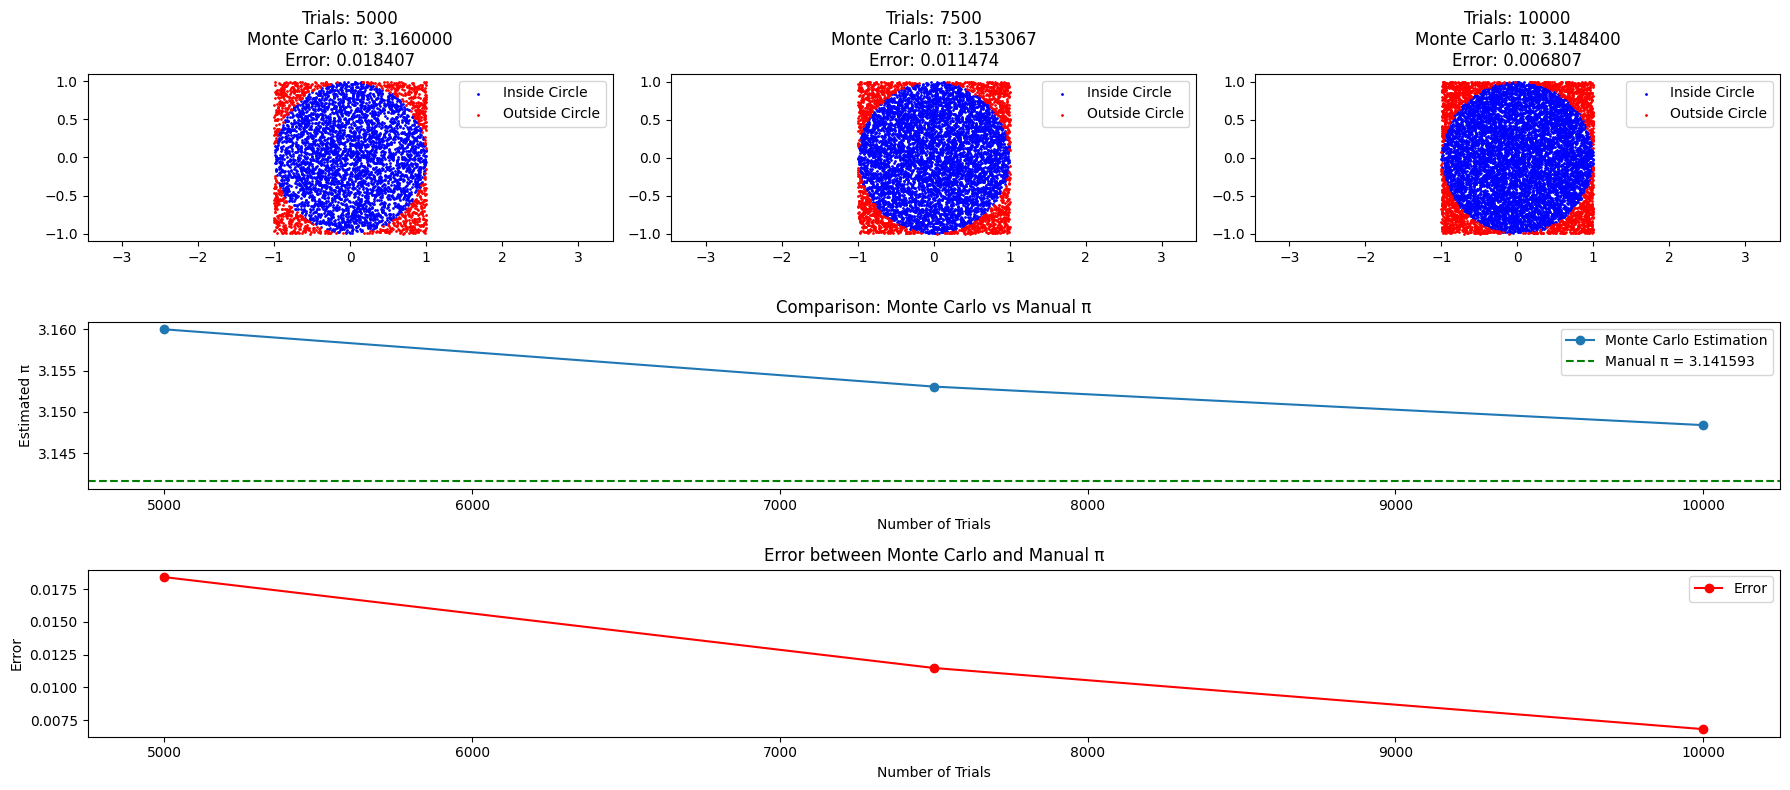

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(n_trials):
    n_inside = 0
    x_rand = np.random.uniform(-1, 1, n_trials)
    y_rand = np.random.uniform(-1, 1, n_trials)

    inside_x, inside_y = [], []
    outside_x, outside_y = [], []

    for x, y in zip(x_rand, y_rand):
        if x**2 + y**2 <= 1:
            n_inside += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    pi_estimate = 4 * n_inside / n_trials
    return pi_estimate, inside_x, inside_y, outside_x, outside_y

def plot_results(trials_list):
    pi_manual = np.pi  # Nilai manual Pi untuk perbandingan
    estimates = []
    errors = []

    plt.figure(figsize=(18, 8))

    for i, n_trials in enumerate(trials_list):
        pi_estimate, inside_x, inside_y, outside_x, outside_y = monte_carlo_pi(n_trials)
        estimates.append(pi_estimate)
        error = abs(pi_estimate - pi_manual)
        errors.append(error)

        # Subplot untuk visualisasi titik
        plt.subplot(3, len(trials_list), i + 1)
        plt.scatter(inside_x, inside_y, color='blue', s=1, label='Inside Circle')
        plt.scatter(outside_x, outside_y, color='red', s=1, label='Outside Circle')
        plt.title(f'Trials: {n_trials}\nMonte Carlo π: {pi_estimate:.6f}\nError: {error:.6f}')
        plt.axis('equal')
        plt.legend()

    # Subplot untuk perbandingan hasil Monte Carlo vs nilai manual
    plt.subplot(3, 1, 2)
    plt.plot(trials_list, estimates, 'o-', label='Monte Carlo Estimation')
    plt.axhline(y=pi_manual, color='green', linestyle='--', label=f'Manual π = {pi_manual:.6f}')
    plt.xlabel('Number of Trials')
    plt.ylabel('Estimated π')
    plt.title('Comparison: Monte Carlo vs Manual π')
    plt.legend()

    # Subplot untuk nilai error
    plt.subplot(3, 1, 3)
    plt.plot(trials_list, errors, 'o-', color='red', label='Error')
    plt.xlabel('Number of Trials')
    plt.ylabel('Error')
    plt.title('Error between Monte Carlo and Manual π')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Daftar percobaan: 5000, 7500, 10000
plot_results([5000, 7500, 10000])


Tahun ke-1:
  Rata-rata Permintaan: 781.58 ribu ton
  Rata-rata Laba: Rp 20,785,281,964.25

Tahun ke-2:
  Rata-rata Permintaan: 781.42 ribu ton
  Rata-rata Laba: Rp 20,781,168,004.98

Tahun ke-3:
  Rata-rata Permintaan: 781.39 ribu ton
  Rata-rata Laba: Rp 20,780,172,219.00



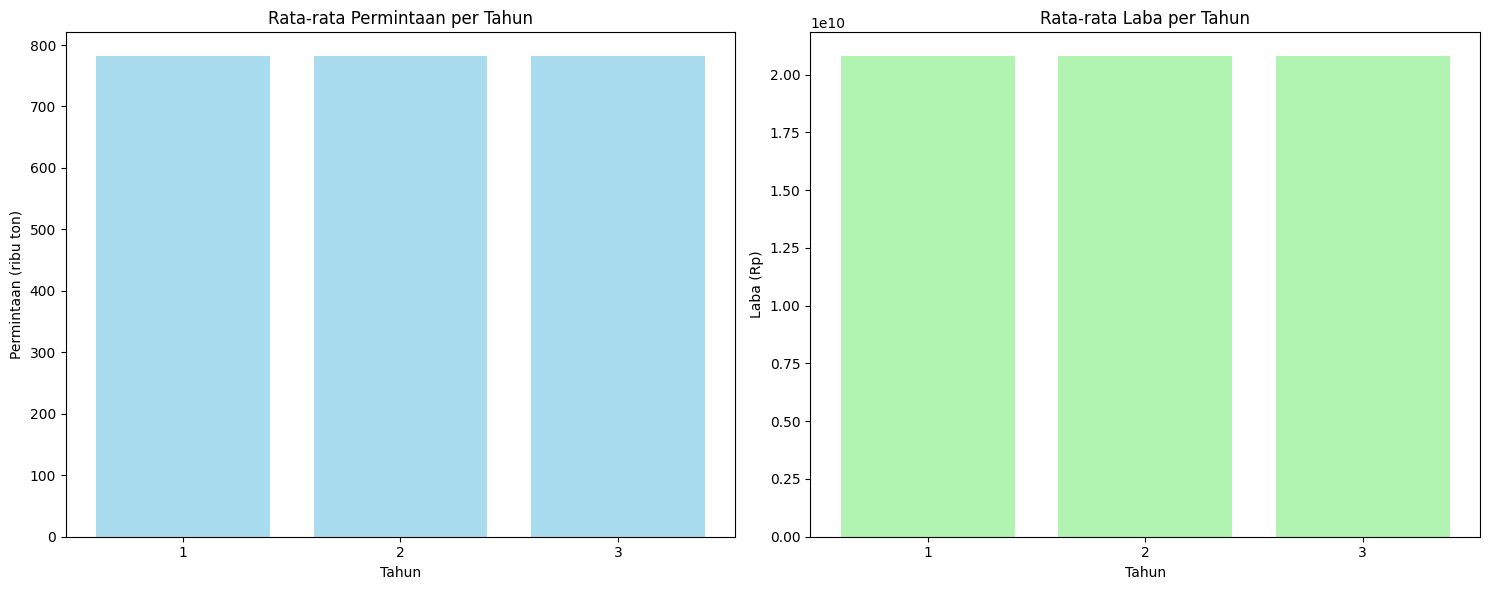

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Data produksi permintaan kopi /thn histori permintaan thn 2021 (dalam ribu ton)
data_produksi = np.array([775, 774.6, 794.8])  # dalam ribu ton
mean_demand = np.mean(data_produksi)  # Rata-rata permintaan
std_dev_demand = np.std(data_produksi)  # Deviasi standar

# Parameter harga dan biaya
price_per_unit = 33242496  # Asumsi harga jual per ton 33 Juta (dalam Rp)
cost_per_unit = 6648499  # Asumsi biaya per ton 20% (dalam Rp)

# Fungsi simulasi Monte Carlo
1
# Plot hasil simulasi
def plot_simulation_results(all_demand, total_profit, years):
    mean_demand_list = [np.mean(demand) for demand in all_demand]
    mean_profit_list = [np.mean(profit) for profit in total_profit]

    plt.figure(figsize=(15, 6))

    # Grafik Batang untuk Permintaan
    plt.subplot(1, 2, 1)
    plt.bar(range(1, years + 1), mean_demand_list, color='skyblue', alpha=0.7)
    plt.title("Rata-rata Permintaan per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Permintaan (ribu ton)")
    plt.xticks(range(1, years + 1))

    # Grafik Batang untuk Laba
    plt.subplot(1, 2, 2)
    plt.bar(range(1, years + 1), mean_profit_list, color='lightgreen', alpha=0.7)
    plt.title("Rata-rata Laba per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Laba (Rp)")
    plt.xticks(range(1, years + 1))

    plt.tight_layout()
    plt.show()

# Parameter simulasi
years = 3  # Simulasi untuk 3 tahun ke depan
n_simulations = 10000  # Jumlah simulasi per tahun

# Jalankan simulasi
all_demand, total_profit = monte_carlo_sales_forecast(
    years, n_simulations, mean_demand, std_dev_demand, price_per_unit, cost_per_unit
)
plot_simulation_results(all_demand, total_profit, years)


Tahun ke-1:
  Rata-rata Permintaan: 781.38 ribu ton
  Rata-rata Laba: Rp 24,724,746,032.04

Tahun ke-2:
  Rata-rata Permintaan: 781.58 ribu ton
  Rata-rata Laba: Rp 24,731,158,217.09

Tahun ke-3:
  Rata-rata Permintaan: 781.41 ribu ton
  Rata-rata Laba: Rp 24,725,835,453.81



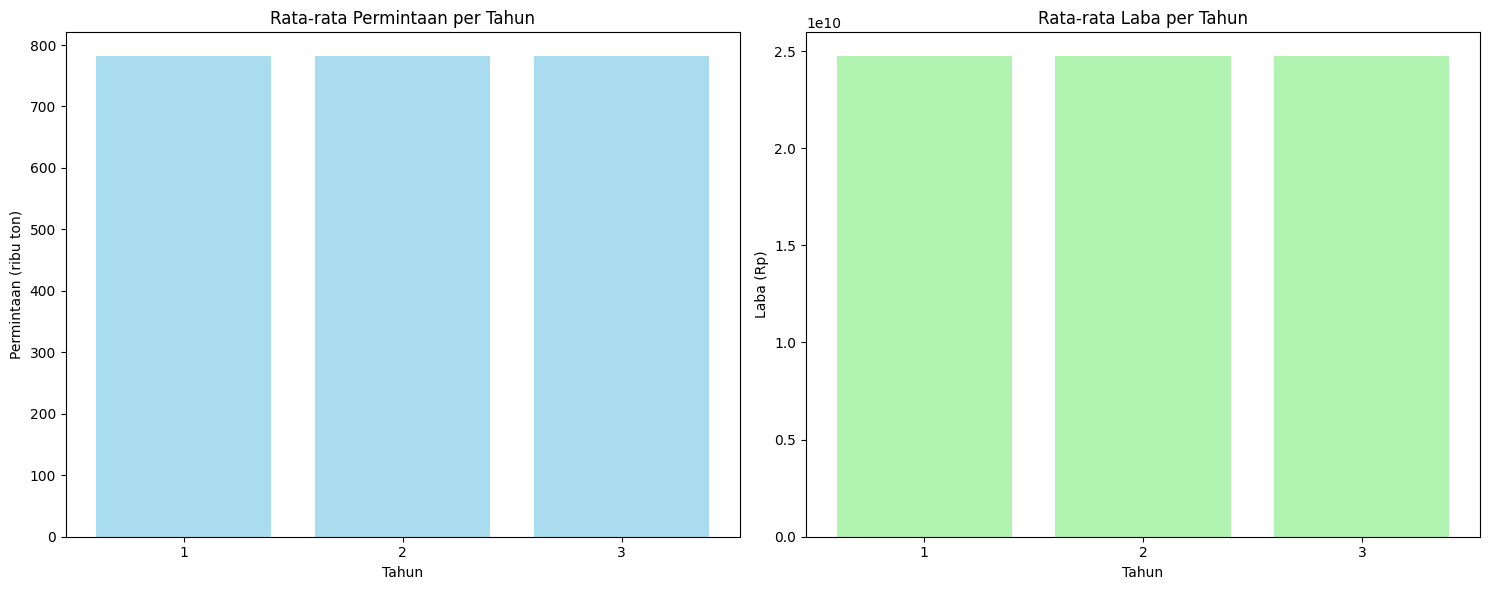

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data produksi kopi (dalam ribu ton)
data_produksi = np.array([775, 774.6, 794.8])  # dalam ribu ton
mean_demand = np.mean(data_produksi)  # Rata-rata permintaan
std_dev_demand = np.std(data_produksi)  # Deviasi standar

# Parameter harga dan biaya
price_per_unit = 33242496  # Asumsi harga jual per ton (Rp)
cost_per_unit = 1600000  # Asumsi biaya per ton (Rp)

# Fungsi simulasi Monte Carlo
def monte_carlo_sales_forecast(years, n_simulations, mean_demand, std_dev_demand, price_per_unit, cost_per_unit):
    total_profit = []
    all_demand = []

    for year in range(1, years + 1):
        demand = np.random.normal(loc=mean_demand, scale=std_dev_demand, size=n_simulations)
        profit = (price_per_unit - cost_per_unit) * demand

        # Menghilangkan kerugian dengan memastikan laba minimum 0
        profit = np.maximum(profit, 0)

        all_demand.append(demand)
        total_profit.append(profit)

        print(f"Tahun ke-{year}:")
        print(f"  Rata-rata Permintaan: {np.mean(demand):.2f} ribu ton")
        print(f"  Rata-rata Laba: Rp {np.mean(profit):,.2f}\n")

    return all_demand, total_profit

# Plot hasil simulasi
def plot_simulation_results(all_demand, total_profit, years):
    mean_demand_list = [np.mean(demand) for demand in all_demand]
    mean_profit_list = [np.mean(profit) for profit in total_profit]

    plt.figure(figsize=(15, 6))

    # Grafik Batang untuk Permintaan
    plt.subplot(1, 2, 1)
    plt.bar(range(1, years + 1), mean_demand_list, color='skyblue', alpha=0.7)
    plt.title("Rata-rata Permintaan per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Permintaan (ribu ton)")
    plt.xticks(range(1, years + 1))

    # Grafik Batang untuk Laba
    plt.subplot(1, 2, 2)
    plt.bar(range(1, years + 1), mean_profit_list, color='lightgreen', alpha=0.7)
    plt.title("Rata-rata Laba per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Laba (Rp)")
    plt.xticks(range(1, years + 1))

    plt.tight_layout()
    plt.show()

# Parameter simulasi
years = 3  # Simulasi untuk 3 tahun ke depan
n_simulations = 10000  # Jumlah simulasi per tahun

# Jalankan simulasi
all_demand, total_profit = monte_carlo_sales_forecast(
    years, n_simulations, mean_demand, std_dev_demand, price_per_unit, cost_per_unit
)
plot_simulation_results(all_demand, total_profit, years)


Tahun ke-1:
  Rata-rata Permintaan: 781.41 ribu ton
  Rata-rata Laba: Rp 24,725,621,332.87

Tahun ke-2:
  Rata-rata Permintaan: 820.64 ribu ton
  Rata-rata Laba: Rp 25,967,045,107.51

Tahun ke-3:
  Rata-rata Permintaan: 861.47 ribu ton
  Rata-rata Laba: Rp 27,259,145,942.33



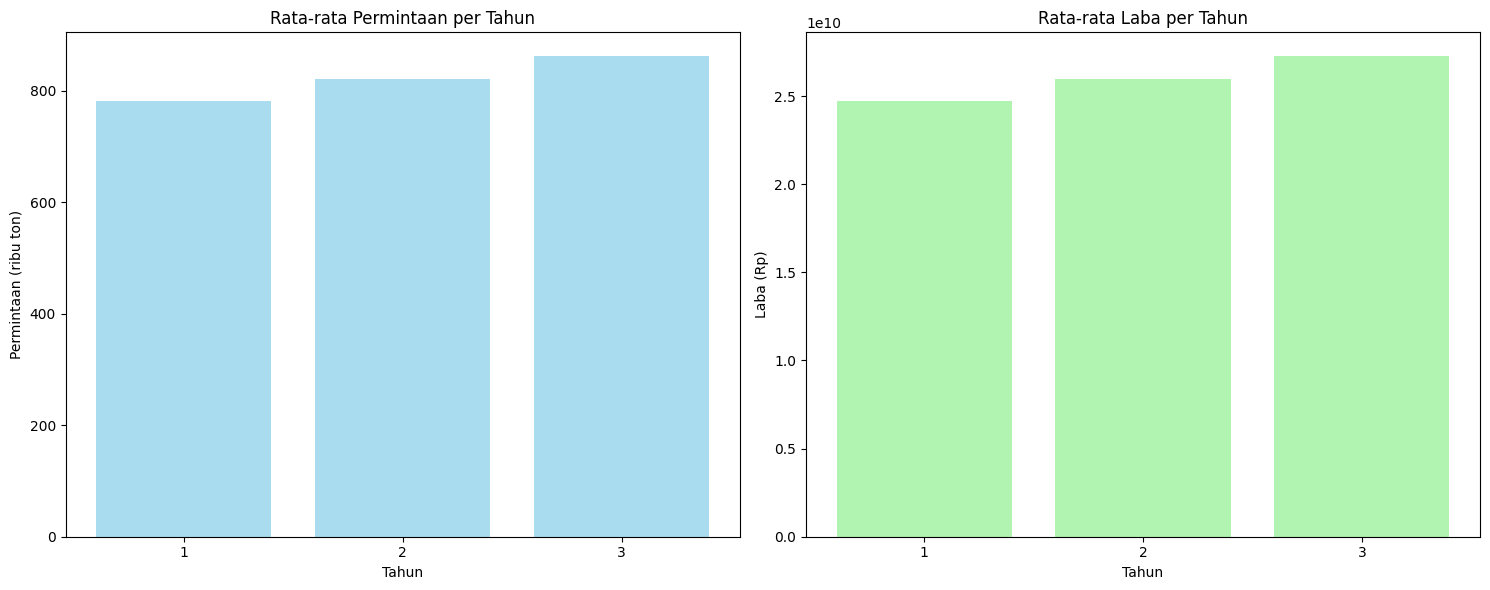

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Data produksi kopi (dalam ribu ton)
data_produksi = np.array([775, 774.6, 794.8])  # dalam ribu ton
mean_demand = np.mean(data_produksi)  # Rata-rata permintaan
std_dev_demand = np.std(data_produksi)  # Deviasi standar

# Parameter harga dan biaya
price_per_unit = 33242496  # Asumsi harga jual per ton (Rp)
cost_per_unit = 1600000  # Asumsi biaya per ton (Rp)
demand_growth_rate = 0.05  # Asumsi pertumbuhan permintaan 5% per tahun

# Fungsi simulasi Monte Carlo dengan peningkatan permintaan setiap tahun
def monte_carlo_sales_forecast(years, n_simulations, mean_demand, std_dev_demand, price_per_unit, cost_per_unit, demand_growth_rate):
    total_profit = []
    all_demand = []

    for year in range(1, years + 1):
        # Permintaan meningkat berdasarkan pertumbuhan tahunan
        current_mean_demand = mean_demand * (1 + demand_growth_rate) ** (year - 1)
        demand = np.random.normal(loc=current_mean_demand, scale=std_dev_demand, size=n_simulations)
        profit = (price_per_unit - cost_per_unit) * demand

        # Menghilangkan kerugian dengan memastikan laba minimum 0
        profit = np.maximum(profit, 0)

        all_demand.append(demand)
        total_profit.append(profit)

        print(f"Tahun ke-{year}:")
        print(f"  Rata-rata Permintaan: {np.mean(demand):.2f} ribu ton")
        print(f"  Rata-rata Laba: Rp {np.mean(profit):,.2f}\n")

    return all_demand, total_profit

# Plot hasil simulasi
def plot_simulation_results(all_demand, total_profit, years):
    mean_demand_list = [np.mean(demand) for demand in all_demand]
    mean_profit_list = [np.mean(profit) for profit in total_profit]

    plt.figure(figsize=(15, 6))

    # Grafik Batang untuk Permintaan
    plt.subplot(1, 2, 1)
    plt.bar(range(1, years + 1), mean_demand_list, color='skyblue', alpha=0.7)
    plt.title("Rata-rata Permintaan per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Permintaan (ribu ton)")
    plt.xticks(range(1, years + 1))

    # Grafik Batang untuk Laba
    plt.subplot(1, 2, 2)
    plt.bar(range(1, years + 1), mean_profit_list, color='lightgreen', alpha=0.7)
    plt.title("Rata-rata Laba per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Laba (Rp)")
    plt.xticks(range(1, years + 1))

    plt.tight_layout()
    plt.show()

# Parameter simulasi
years = 3  # Simulasi untuk 3 tahun ke depan
n_simulations = 10000  # Jumlah simulasi per tahun

# Jalankan simulasi dengan pertumbuhan permintaan
all_demand, total_profit = monte_carlo_sales_forecast(
    years, n_simulations, mean_demand, std_dev_demand, price_per_unit, cost_per_unit, demand_growth_rate
)
plot_simulation_results(all_demand, total_profit, years)
